# Cálculo de trayectoria para nave exploratoria lunar

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

**a)** Vamos a suponer la Tierra inmóvil y la Luna siguiendo una órbita circular cuya frecuencia angular es $\omega = 2.6617×10^{−6} s^{-1}$. Esto evita integrar la ecuación de la Luna, la cuál es en realidad elíptica.

In [14]:
ome = 2.6616e-6 # Frecuencia angular de la órbita lunar

**b)** La simulación será realizada en el S.I. de unidades que resulta más conveniente en el caso del
sistema Tierra-Luna. El paso de integración deben ser segundos de vuelo ($h \propto s$), pero se debe
graficar cada 1000 pasos usando animation dado que el viaje a la Luna dura días terrestres.

In [15]:
G = 6.67e-11    # Constante gravitacional
MT = 5.9736e+24 # Masa de la Tierra
RT = 6.3781e+6  # Radio terrestre
ML = 7.349e+22  # Masa de la Luna
RL = 1.7374e+6  # Radio de la Lunar
d = 3.844e+8    # Distancia Tierra-Luna

**c)** Muestre usando la Figura 1 que la distancia Nave-Luna está dada por:

Para esto, se puede usar la ley del coseno. Sea $\vec{r}(t)$ la posición de la nave, $\vec{d}$ la posición de la Luna y $\vec{r}_L = \vec{r}-\vec{d}$ la distancia Nave-Luna. Entonces, se tendrá

$$ |\vec{r}_L|^2 = |\vec{r}|^2 + |\vec{d}|^2 - 2 \vec{r}\cdot \vec{d} $$
$$ |\vec{r}_L|^2 = |\vec{r}|^2 + |\vec{d}|^2 - 2 |\vec{r}|| \vec{d}| \cos \theta $$

donde $\theta$ es el ángulo entre la posición de la nave y la posición de la Luna, dado por $\theta = \phi(t) - \omega t$. Entonces,

$$ r_L = \sqrt{r^2 + d^2 - 2rd\cos (\phi - \omega t)  } $$

**d)** Usando esta distancia muestre que el Hamiltoniano de la nave está dado por:

Recordemos que para un sistema de $n$ coordenadas canónicas, el Hamiltoniano está dado por

$$ \mathcal{H}  = \sum_{i=1}^n p_i \dot{q}_i - \mathcal{L} $$

A su vez, el Lagrangiano estará dado por 

$$ \mathcal{L} = T + V = \frac{1}{2} m \dot{r}^2 + \frac{1}{2}mr^2 \dot{\phi}^2  + \frac{Gmm_T}{r} + \frac{Gmm_L}{r_L}$$

Los momentos generalizados están dados por 

$$p_r = \frac{\partial L}{\partial \dot{r}} = m\dot{r} $$

$$p_\phi = \frac{\partial L}{\partial \dot{\phi}} = mr^2\dot{\phi} $$

Reemplazando, se tendrá entonces un Lagrangiano en función de estos momentos dado por  

$$  \mathcal{L}  = \frac{p_r^2}{2m} + \frac{p_\phi^2}{2mr^2} + \frac{Gmm_T}{r} + \frac{Gmm_L}{r_L} $$

Y un Hamiltoniano dado por 


$$ \mathcal{H}  = p_r \dot{r} + p_{\phi}\dot{\phi} - \mathcal{L} $$ 
$$ \mathcal{H}  =  \frac{p_r^2}{m} + \frac{p_\phi^2}{mr^2} - \mathcal{L} $$
$$ \mathcal{H}  =  \frac{p_r^2}{m} + \frac{p_\phi^2}{mr^2} - \frac{p_r^2}{2m} - \frac{p_\phi^2}{2mr^2} - \frac{Gmm_T}{r} - \frac{Gmm_L}{r_L} $$
$$ \mathcal{H}  =   \frac{p_r^2}{2m} + \frac{p_\phi^2}{2mr^2} - \frac{Gmm_T}{r} - \frac{Gmm_L}{r_L} $$

**e)** Muestre que las ecuaciones de Hamilton, que son las ecuaciones de movimiento están dadas por:

Las velocidades generalizadas estarán dadas por 

$$ \dot{r} = \frac{\partial \mathcal{H}}{\partial p_r} = \frac{2p_r}{2m} = \frac{p_r}{m} $$
$$ \dot{\phi} = \frac{\partial \mathcal{H}}{\partial p_\phi} = \frac{2p_\phi}{2mr^2} = \frac{p_\phi}{mr^2} $$

A su vez, las derivadas de los momentos generalizados (fuerzas) estarán dadas por

$$ \dot{p}_r =  - \frac{\partial \mathcal{H}}{\partial r} = \frac{p_\phi^2}{mr^3}- \frac{Gmm_T}{r^2} - \frac{Gmm_L}{r_L^2} \frac{\partial r_L}{\partial r} $$
Se tiene además que 

$$ \frac{\partial r_L}{\partial r}  = \frac{\partial}{\partial r} \sqrt{r^2 + d^2 - 2rd\cos (\phi - \omega t)  }  = \frac{1}{2r_L} (2r-2d\cos (\phi - \omega t) = \frac{r-d\cos(\phi - \omega t)}{r_L} $$

Entonces se tiene 

$$ \dot{p}_r = - \frac{\partial \mathcal{H}}{\partial r} = \frac{p_\phi^2}{mr^3}  - \frac{Gmm_T}{r^2} - \frac{Gmm_L}{r_L^3}(r-d\cos(\phi - \omega t))$$

Por el otro lado, para el momento generalizado angular se tiene 

$$ \dot{p}_\phi = - \frac{\partial \mathcal{H}}{\partial \phi} = - \frac{Gmm_L}{r_L^2} \frac{\partial r_L}{\partial \phi} $$

Utilizando la derivada

$$ \frac{\partial r_L}{\partial \phi}  = \frac{2rd\sin ( \phi - \omega t)}{2r_L} = \frac{rd \sin (\phi - \omega t)}{r_L} $$

En total se tendrá,

$$ \dot{p}_\phi = - \frac{\partial \mathcal{H}}{\partial \phi} = - \frac{Gmm_L}{r_L^3} rd \sin (\phi - \omega t) $$

**f)** Para reducir el error de redondeo se pueden definir nuevas variables normalizadas a la distancia lunar

Para la primera ecuación de la derivada de la posición tenemos, al dividir por la distancia

$$ \frac{\dot{r}}{d} = \frac{p_r}{md} $$

Reemplazando entonces $\tilde{r} = r/d$ y $\tilde{p}_r = p_r/md$ se tiene

$$\dot{\tilde{r}} = \tilde{p}_r $$

Para el ángulo se tendrá sencillamente,

$$ \dot{\phi} = \frac{p_\phi}{mr^2} = \frac{p_\phi}{md^2 \tilde{r}^2}$$

Sustituyendo $\tilde{p}_\phi = p_\phi/md^2$ se tiene

$$ \dot{\phi} = \frac{\tilde{p}_\phi}{\tilde{r}^2} $$

Notamos que la derivada del momento radial será

$$ \frac{\dot{p}_r}{md} = \frac{p_\phi^2}{m^2 dr^3}  - \frac{Gm_T}{dr^2} - \frac{Gm_L}{dr_L^3}(r-d\cos(\phi - \omega t)) $$

Recordando que $p_r = md \tilde{p}_r, r=d\tilde{r}, p_\phi = md^2 \tilde{p}_\phi$ se tendrá

$$ \dot{\tilde{p}_r} = \frac{\tilde{p}_\phi}{\tilde{r}^3}  - \frac{Gm_T}{ d^3 \tilde{r}^2} - \frac{Gm_L}{r_L^3}(\tilde{r}-\cos(\phi - \omega t)) $$

Se puede factorizar entonces $Gm_T/d^3$ para tener

$$ \dot{\tilde{p}_r} = \frac{\tilde{p}_\phi}{\tilde{r}^3}  - \frac{Gm_T}{d^3} \left( \frac{1}{ \tilde{r}^2} - \frac{m_L d^3}{m_T r_L^3}(\tilde{r}-\cos(\phi - \omega t)) \right) $$

Así mismo, vemos que la expresión calculada en el inciso **c)** puede ser transformada a 

$$ r_L = d\sqrt{\tilde{r}^2+1 - 2\tilde{r}\cos(\phi - \omega t)}$$

y además definir un $\tilde{r}' = r_L/d$ para tener

$$ \dot{\tilde{p}_r} = \frac{\tilde{p}_\phi}{\tilde{r}^3}  - \frac{Gm_T}{d^3} \left( \frac{1}{ \tilde{r}^2} - \frac{m_L }{m_T \tilde{r}'^3}(\tilde{r}-\cos(\phi - \omega t)) \right) $$

Por último, se definen las constantes $\Delta = Gm_T/d^3$ y $\mu = m_L/m_T$ para tener

$$ \dot{\tilde{p}_r} = \frac{\tilde{p}_\phi}{\tilde{r}^3}  - \Delta \left( \frac{1}{ \tilde{r}^2} - \frac{\mu }{ \tilde{r}'^3}(\tilde{r}-\cos(\phi - \omega t)) \right) $$

Para el componente angular, se tiene 

$$ \frac{\dot{p}_\phi}{md^2} = - \frac{Gm_L}{dr_L^3} r \sin (\phi - \omega t) $$
$$ \dot{\tilde{p}_\phi} = - \frac{Gm_L}{r_L^3} \tilde{r} \sin (\phi - \omega t) $$
$$ \dot{\tilde{p}_\phi} = - \frac{Gm_L}{d^3 \tilde{r}'^3} \tilde{r} \sin (\phi - \omega t) = -\frac{G\mu}{\tilde{r}'^3}\tilde{r} \sin (\phi - \omega t) $$

**g)** Note que usando cordenadas polares con $r^2 = x^2+y^2$ y $\tan \theta = y/x$, podemos transformar el sistema pues 

$$\tilde{p}_r = \frac{p_r}{md} = \frac{1}{d} \frac{dr}{dt} = \frac{1}{d} \frac{d}{dt}\sqrt{x^2+y^2}= \frac{1}{2d} (x^2+y^2)^{-1/2} (2x \dot{x}+2y\dot{y}) = \frac{x\dot{x}+y\dot{y}}{rd} $$

Así mismo,

$$\tilde{p}_\phi = \frac{p_\phi}{md^2} = \tilde{r}^2 \frac{d\phi}{dt} = \tilde{r}^2 \frac{d}{dt} \arctan \frac{y}{x} = \tilde{r}^2 \frac{\dot{y}x-\dot{x}y}{x^2+y^2}= \frac{\tilde{r}^2}{r^2}(\dot{y}x-\dot{x}y) = \frac{\dot{y}x-\dot{x}y}{d^2}  $$ 

En este punto, se puede utilizar el diagrama de lanzamiento de la Tierra donde claramente $x=r\cos \phi, y=r\sin \phi, \dot{x}=v_x=v\cos \theta$ y $\dot{y}=v_y=v\sin \theta$. Esto nos permite escribir

$$ \tilde{p}_r = \frac{p_r}{md} = \frac{rv}{rd} (\cos \theta \cos \phi + \sin \theta \sin \phi) = \tilde{v} \cos(\theta-\phi) $$

$$ \tilde{p}_\phi = \frac{p_\phi}{md^2} = \frac{rv}{d^2} (\sin \theta \cos \phi - \cos \theta \sin \phi) = \tilde{r}\tilde{v} \sin (\theta - \phi)  $$

### Método para resolver la ODE del cohete

Para encontrar una solución numérica al problema, usamos el algoritmo de Runge-Kutta de orden 4 (RK4).

In [38]:
def RK4 (f, xi, t):
    """
    Implementación del algoritmo de Runge-Kutta de orden 4 para resolver sistemas
    de ecuaciones diferenciales.

    Args:
    f: función de la ED y'=f(t,y)
    xi: condición inicial
    t: discretización uniformemente espaciada del intervalo temporal.
    """
    h = t[1]-t[0]
    y = xi
    solution = np.array(xi)

    for i in range(1,len(t)):
        k1 = f(t[i-1],y)
        k2 = f(t[i-1]+0.5*h, y + 0.5*h*k1)
        k3 = f(t[i-1]+0.5*h, y + 0.5*h*k2)
        k4 = f(t[i-1]+h, y + h*k3)

        y += h*(k1+2*k2+2*k3+k4)/6.
        solution = np.vstack([solution, y])

    return np.transpose(solution)

### Resolución del problema

Primero, se definen las constantes del problema.

La implementación del algoritmo RK4 que hemos desarrollado permite resolver sistemas de ODEs de la forma $$\mathbf{x}' = f(t,\mathbf{x}).$$ Solo es necesario definir la función del lado derecho.

In [39]:
def f(t,x):
    """
    t: tiempo
    x: vector de cuatro componentes.
    --- x[0]: r/d
    --- x[1]: phi
    --- x[2]: momento conjugado a x[0], p_r
    --- x[3]: momento conjugado a x[1], p_\phi
    """
    cs = np.cos(x[1]-ome*t)
    r_ = np.sqrt(1 + x[0]**2 - 2*x[0]*cs)
    Delta = G*MT/(d**3)
    mu = ML/MT
    d0 = x[2]
    d1 = x[3]/ (x[0]**2)
    d2 = (x[3]**2) / (x[0]**3) - Delta*(x[0]**(-2) + mu/(r_**3)*(x[0]-cs))
    d3 = -(Delta*mu*x[0] / (r_**3)) *np.sin(x[1]-ome*t)
    
    return np.array([d0, d1, d2, d3])

In [40]:
def pr(v0,d,theta,phi):
    return (v0/d)*np.cos(theta-phi)

def pphi(r0,v0,d,theta,phi):
    return (r0/d)*(v0/d)*np.sin(theta-phi)

In [41]:
vescape = np.sqrt(2*G*MT/RT)

In [45]:
t = np.linspace(0,100)
rtilde0 = RT/d
phi0 = 0
theta0 = 0
pr0 = pr(vescape, d, theta0, phi0)
pphi0 = pphi(RT, vescape, d, theta0, phi0)
xi = np.array([rtilde0,phi0,pr0,pphi0])
#sol = RK4(f,xi,t)
r_sol, phi_sol, pr_sol, pphi_sol = RK4(f,xi,t)

Text(0.5, 0, 't[s]')

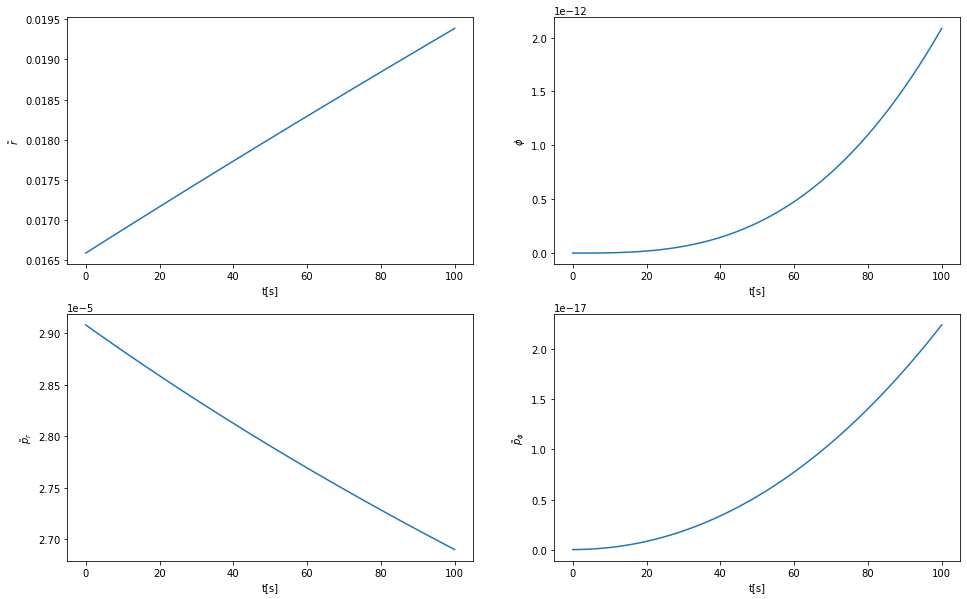

In [53]:
fig, axs = plt.subplots(2,2,figsize=(16,10))

axs[0,0].plot(t,r_sol)
axs[0,0].set_ylabel(r'$\tilde{r}$')
axs[0,0].set_xlabel('t[s]')

axs[0,1].plot(t,phi_sol)
axs[0,1].set_ylabel(r'$\phi$')
axs[0,1].set_xlabel('t[s]')

axs[1,0].plot(t,pr_sol)
axs[1,0].set_ylabel(r'$\tilde{p}_r$')
axs[1,0].set_xlabel('t[s]')

axs[1,1].plot(t,pphi_sol)
axs[1,1].set_ylabel(r'$\tilde{p}_\phi$')
axs[1,1].set_xlabel('t[s]')
